In [1]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
%matplotlib inline
# Import dependancies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from matplotlib import pyplot as plt

# Machine learning on car collision data

In [6]:
# Load the data
file_path = Path('collision_data_ml_truck.csv')
ml_df = pd.read_csv(file_path)
ml_df

,case_id,party_number,victim_number,accident_year,collision_time,day_of_week,weather_1,primary_coll_factor,type_of_collision,at_fault,...,road_cond_1,lighting,point_x,point_y,victim_age,severe_injury,safety_equip_used,victim_sex,victim_seating_postion,victim_ejected
0,8789755,3,1,2019,1549,1,B,A,C,N,...,H,A,-118.060410,33.963806,44,0,GM,F,1,0
1,8789755,3,2,2019,1549,1,B,A,C,N,...,H,A,-118.060410,33.963806,10,0,GM,F,3,0
2,90698692,1,1,2018,1850,5,A,A,C,Y,...,H,C,-118.289986,33.859360,40,0,GP,M,5,0
3,90698692,1,2,2018,1850,5,A,A,C,Y,...,H,C,-118.289986,33.859360,59,0,GM,M,3,0
4,8296242,2,1,2017,1710,5,A,A,D,N,...,H,B,-118.130630,34.718540,52,0,GM,M,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12312,90977689,1,1,2019,1545,3,A,A,C,Y,...,H,A,-118.193039,33.890583,40,0,GM,M,1,0
12313,91083697,2,1,2019,2325,3,A,A,B,N,...,H,C,-118.146523,33.995522,55,0,GM,M,1,0
12314,91146485,2,1,2019,1545,7,B,A,A,N,...,H,A,-117.833542,34.292549,48,0,GM,M,3,0
12315,90671067,2,1,2018,1705,4,A,A,C,N,...,H,A,-118.061035,34.006775,19,0,GM,M,1,0


In [7]:
ml_df = ml_df.drop(columns=["case_id", "party_number", "victim_number", 
                            "accident_year", "vehicle_make", "point_x", 
                            "point_y", "stwd_vehicle_type", "oaf_1", 
                            "primary_coll_factor", "party_sex", "at_fault",
                           "victim_age", "victim_sex", "race"])
ml_df            

,collision_time,day_of_week,weather_1,type_of_collision,party_soberiety,move_pre_acc,vehicle_year,road_surface,road_cond_1,lighting,severe_injury,safety_equip_used,victim_seating_postion,victim_ejected
0,1549,1,B,C,A,A,2007,B,H,A,0,GM,1,0
1,1549,1,B,C,A,A,2007,B,H,A,0,GM,3,0
2,1850,5,A,C,A,B,2012,A,H,C,0,GP,5,0
3,1850,5,A,C,A,B,2012,A,H,C,0,GM,3,0
4,1710,5,A,D,A,B,2005,A,H,B,0,GM,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12312,1545,3,A,C,A,B,2004,A,H,A,0,GM,1,0
12313,2325,3,A,B,A,B,1996,A,H,C,0,GM,1,0
12314,1545,7,B,A,A,B,1998,B,H,A,0,GM,3,0
12315,1705,4,A,C,A,A,2015,A,H,A,0,GM,1,0


In [8]:
ml_df.dtypes[ml_df.dtypes != 'int64'][ml_df.dtypes != 'float64']

weather_1            object
type_of_collision    object
party_soberiety      object
move_pre_acc         object
road_surface         object
road_cond_1          object
lighting             object
safety_equip_used    object
dtype: object

In [9]:
# Check weather data
ml_df["weather_1"].value_counts()

A    10686
B     1221
C      378
E       13
F        9
G        6
D        4
Name: weather_1, dtype: int64

A - Clear
B - Cloudy
C - Raining
D - Snowing
E - Fog
F - Other
G - Wind

In [11]:
# Check collision factor
# ml_df["primary_coll_factor"].value_counts()

A - (Vehicle) Code Violation
B - Other Improper Driving

In [12]:
# Check type of collision
ml_df["type_of_collision"].value_counts()

C    5054
D    3812
B    1254
A     962
E     902
F     168
G     115
H      50
Name: type_of_collision, dtype: int64

A - Head-On
B - Sideswipe
C - Rear End
D - Broadside
E - Hit Object
F - Overturned
G - Vehicle/Pedestrian
H - Other

In [14]:
# Check at fault data
# ml_df["at_fault"].value_counts()

In [10]:
# Check victim sex data
ml_df["party_sex"].value_counts()

M    86648
F    85700
X        4
Name: party_sex, dtype: int64

In [11]:
# Check sobriety factor
ml_df["party_soberiety"].value_counts()

A    158264
B      6170
H      3327
G      2674
C      1548
D       369
Name: party_soberiety, dtype: int64

A - Had not been Drinking
B - Had been Drinking, Under Influence
C - Had been Drinking, Not Under Influence
D - Had been Drinking, Impairment Unknown
G - Impairment Unknown
H - Not Applicable

In [17]:
# Check oaf factor
# ml_df["oaf_1"].value_counts()

A - Violation
E - Vision Obscurements
F - Inattention (beginning 1/1/01; see Inattention Item Name near end of record for A-K, P values)
G - Stop and Go Traffic
H - Entering/Leaving Ramp
I - Previous Collision
J - Unfamiliar With Road
K - Defective Vehicle Equipment
L - Uninvolved Vehicle
M - Other
N - None Apparent
O - Runaway Vehicle
P - Inattention, Cell Phone (1/1/01)
Q - Inattention, Electronic Equip.(1/1/01)
R - Inattention, Radio/CD (1/1/01)
S - Inattention, Smoking (1/1/01)
T - Inattention, Eating (1/1/01)
U - Inattention, Children (1/1/01)
V - Inattention, Animal (1/1/01)
W - Inattention, Personal Hygiene (1/1/01)
X - Inattention, Reading (1/1/01)
Y - Inattention, Other (1/1/01)
- - Not Stated

In [19]:
# Check movement pre accident factor
move_pre_acc = ml_df["move_pre_acc"].value_counts()
move_pre_acc

B    6259
A    2436
E    1128
H     866
R     381
M     256
J     213
D     197
C     154
L     125
F     108
N      66
G      44
I      26
Q      20
P      17
K      12
O       9
Name: move_pre_acc, dtype: int64

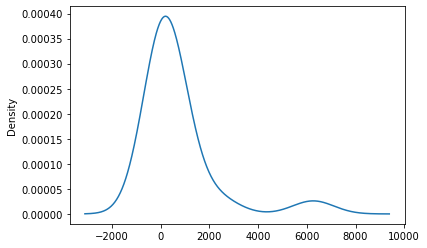

In [20]:
# Visualize the value counts of move_pre_acc
plot = move_pre_acc.plot.density()
fig = plot.get_figure()


A - Stopped
B - Proceeding Straight
C - Ran Off Road
D - Making Right Turn
E - Making Left Turn
F - Making U-Turn
G - Backing
H - Slowing/Stopping
I - Passing Other Vehicle
J - Changing Lanes
K - Parking Maneuver
L - Entering Traffic
M - Other Unsafe Turning
N - Crossed Into Opposing Lane
O - Parked
P - Merging
Q - Traveling Wrong Way
R - Other
- - Not Stated

In [22]:
# Check race feature
# ml_df["race"].value_counts()

In [23]:
# Check road type factor
ml_df["road_surface"].value_counts()

A    11486
B      808
C       20
D        3
Name: road_surface, dtype: int64

A - Dry
B - Wet
C - Snowy or Icy
D - Slippery (Muddy, Oily, etc.)

In [25]:
# Check road conditions factor
ml_df["road_cond_1"].value_counts()

H    12043
D      190
C       32
G       19
A       15
F       12
E        4
B        2
Name: road_cond_1, dtype: int64

	
A - Holes, Deep Ruts
B - Loose Material on Roadway
C - Obstruction on Roadway
D - Construction or Repair Zone
E - Reduced Roadway Width
F - Flooded
G - Other
H - No Unusual Condition

In [26]:
# Check lighting conditions factor
ml_df["lighting"].value_counts()

A    8765
C    2526
D     560
B     452
E      14
Name: lighting, dtype: int64

	
A - Daylight
B - Dusk - Dawn
C - Dark - Street Lights
D - Dark - No Street Lights
E - Dark - Street Lights Not 

In [27]:
# Check safety equipment used conditions factor
pd.set_option('display.max_rows', 120)
ml_df["safety_equip_used"].value_counts()

GM    7901
GL    3039
GP     509
MQ     142
HM     104
HL      89
BM      60
PQ      57
CM      55
BL      42
LQ      34
CP      24
HP      20
LM      19
CL      19
GN      18
FM      16
EM      16
BP      15
BG      13
MP      11
EL       9
PW       7
AP       6
FL       6
LU       6
MU       6
AL       6
PP       5
AM       5
PU       4
BN       4
DM       4
KM       3
MN       3
JQ       3
CN       3
MS       3
EP       2
AG       2
MR       2
GH       2
BB       2
DN       2
LN       1
KL       1
PT       1
JP       1
FP       1
CG       1
DL       1
FN       1
HN       1
MT       1
DP       1
NQ       1
PR       1
HU       1
GU       1
CY       1
NY       1
DQ       1
LP       1
Name: safety_equip_used, dtype: int64

A - None in Vehicle
B - Unknown
C - Lap Belt Used
D - Lap Belt Not Used
E - Shoulder Harness Used
F - Shoulder Harness Not Used
G - Lap/Shoulder Harness Used
H - Lap/Shoulder Harness Not Used
J - Passive Restraint Used
K - Passive Restraint Not Used
L - Air Bag Deployed
M - Air Bag Not Deployed
N - Other
P - Not Required
Q - Child Restraint in Vehicle Used
R - Child Restraint in Vehicle Not Used
S - Child Restraint in Vehicle, Use Unknown
T - Child Restraint in Vehicle, Improper Use
U - No Child Restraint in Vehicle
V - Driver, Motorcycle Helmet Not Used
W - Driver, Motorcycle Helmet Used
X - Passenger, Motorcycle Helmet Not Used
Y - Passenger, Motorcycle Helmet Used
- or blank - Not Stated AX  Z ˛z

In [29]:
# Check safety equipment used conditions factor
# ml_df["victim_sex"].value_counts()

# Machine Learning Modeling

In [31]:
# Convert strings to numeric values
from sklearn.preprocessing import LabelEncoder
ml_encoded = pd.get_dummies(ml_df, columns=["weather_1", "type_of_collision", "party_soberiety", 
                                            "move_pre_acc", "road_surface", "road_cond_1", 
                                            "lighting", "safety_equip_used"])
ml_encoded.head()


,collision_time,day_of_week,vehicle_year,severe_injury,victim_seating_postion,victim_ejected,weather_1_A,weather_1_B,weather_1_C,weather_1_D,...,safety_equip_used_MT,safety_equip_used_MU,safety_equip_used_NQ,safety_equip_used_NY,safety_equip_used_PP,safety_equip_used_PQ,safety_equip_used_PR,safety_equip_used_PT,safety_equip_used_PU,safety_equip_used_PW
0,1549,1,2007,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1549,1,2007,0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1850,5,2012,0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1850,5,2012,0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1710,5,2005,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Create our features
X = ml_encoded.drop("severe_injury", axis=1)
X.head()

# Create our target
y = ml_encoded["severe_injury"]

In [73]:
# Check the balance of our target values
y.value_counts()

0    11941
1      376
Name: severe_injury, dtype: int64

In [74]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Determine the shape of our training and testing sets.
print(f"Training Set X", X_train.shape)
print(f"Testing Set X", X_test.shape)
print(f"Training Set y", y_train.shape)
print(f"Testing Set y", y_test.shape)

Training Set X (9237, 124)
Testing Set X (3080, 124)
Training Set y (9237,)
Testing Set y (3080,)


# Random Oversampler

In [35]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 8949, 1: 8949})

In [36]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [37]:
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.8211540543466493
Testing Score: 0.8207792207792208


In [38]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7698863636363636

In [39]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,2465,527
Actual Severe/Fatality,25,63


# SMOTE Imbalanced sampling 

In [40]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({0: 8949, 1: 8949})

In [41]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [42]:
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.932662119735845
Testing Score: 0.935064935064935


In [43]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.674298128342246

In [44]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,2845,147
Actual Severe/Fatality,53,35


In [45]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.95      0.40      0.97      0.61      0.40      2992
          1       0.19      0.40      0.95      0.26      0.61      0.36        88

avg / total       0.96      0.94      0.41      0.95      0.61      0.40      3080



# SMOTEENN Imbalanced sampling

In [46]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 6563, 1: 8425})

In [47]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [48]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.706216577540107

In [75]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])
cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,2256,736
Actual Severe/Fatality,21,67


In [76]:
# Print the imbalanced classification report
print( classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.75      0.76      0.86      0.76      0.57      2992
          1       0.08      0.76      0.75      0.15      0.76      0.57        88

avg / total       0.96      0.75      0.76      0.84      0.76      0.57      3080



# Balanced Random Forest Classifier

In [77]:
# Imported sklearn and imblearn dependancies
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn import datasets

In [78]:
# Creating a StandardScaler instance and fit with the training data.
scaler = StandardScaler().fit(X_train)
# Scale the X data
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9237, 124)
(3080, 124)
(9237,)
(3080,)


In [79]:
# Resample the training data with the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators = 100, random_state=1)

# Fitting the model
brf_model = brf_model.fit(X_train_scaler, y_train)

# View accuracy of models
print(f'Training Score: {brf_model.score(X_train_scaler, y_train)}')
print(f'Testing Score: {brf_model.score(X_test_scaler, y_test)}')

# Make Prediction
predictions = brf_model.predict(X_test_scaler)

Training Score: 0.7853199090613836
Testing Score: 0.7675324675324675


In [80]:
# Calculated the balanced accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7675324675324675

In [81]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])
cm_df


,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,2294,698
Actual Severe/Fatality,18,70


In [56]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.77      0.80      0.87      0.78      0.61      2992
          1       0.09      0.80      0.77      0.16      0.78      0.61        88

avg / total       0.97      0.77      0.79      0.84      0.78      0.61      3080



In [57]:
# List the features sorted in descending order by feature importance
importances = brf_model.feature_importances_


In [ ]:
# Create dataframe with X data for ranked importance columns
ml_encoded_X = ml_encoded.drop("severe_injury", axis=1)
ml_encoded_X

In [67]:
# Create dataframe containing ranked and sorted feature importances
ranked_importances = sorted(zip(brf_model.feature_importances_, ml_encoded.columns), reverse=True)
ranked_importances

[(0.13981762236291262, 'collision_time'),
 (0.12421556393856925, 'vehicle_year'),
 (0.0759801458822396, 'safety_equip_used_GL'),
 (0.07170905784257771, 'day_of_week'),
 (0.05962265057644955, 'type_of_collision_H'),
 (0.040133979823186304, 'severe_injury'),
 (0.03783108559143831, 'type_of_collision_D'),
 (0.0317110436983611, 'road_cond_1_H'),
 (0.027935496227880344, 'party_soberiety_A'),
 (0.027155822920190278, 'safety_equip_used_GH'),
 (0.024737074286099815, 'type_of_collision_B'),
 (0.01983762940790999, 'type_of_collision_C'),
 (0.019742095725339276, 'move_pre_acc_A'),
 (0.01845601755216552, 'party_soberiety_H'),
 (0.01761350561347951, 'lighting_C'),
 (0.01648839480674774, 'lighting_B'),
 (0.016091317584205553, 'move_pre_acc_Q'),
 (0.016074055096515508, 'party_soberiety_D'),
 (0.013677314525699532, 'weather_1_G'),
 (0.01279228550610658, 'safety_equip_used_HL'),
 (0.011992965946259627, 'safety_equip_used_GU'),
 (0.0115445330043717, 'type_of_collision_A'),
 (0.011315230982354487, 'victi

In [68]:
# Create dataframe containing ranked and sorted feature importances
ranked_importances_df = pd.DataFrame(sorted(ranked_importances, reverse=True), columns=["Importance", "Feature"])
ranked_importances_df

,Importance,Feature
0,0.139818,collision_time
1,0.124216,vehicle_year
2,0.075980,safety_equip_used_GL
3,0.071709,day_of_week
4,0.059623,type_of_collision_H
...,...,...
119,0.000000,safety_equip_used_DL
120,0.000000,safety_equip_used_CY
121,0.000000,safety_equip_used_CP
122,0.000000,road_cond_1_D


<Figure size 1440x720 with 0 Axes>

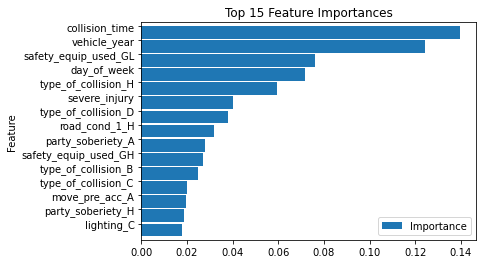

In [71]:
# Visualize top 10 feature importances
top_importances_df = ranked_importances_df.head(15)

plt.figure(figsize=(20,10))
top_importances_df.plot.barh(x="Feature", y="Importance", align='edge', width=0.9,
                      title="Top 15 Feature Importances",
                           ylabel="% Importance")
plt.gca().invert_yaxis()
plt.show
plt.savefig('topfeatureranking.png')


In [60]:
# Show count of total estimators in Balanced Random Forest Classifier
print(len(brf_model.estimators_))

100


# Easy Ensemble Classifier

In [61]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train_scaler, y_train)

# View accuracy of models
print(f'Training Score: {eec.score(X_train_scaler, y_train)}')
print(f'Testing Score: {eec.score(X_test_scaler, y_test)}')


predictions = eec.predict(X_test_scaler)

Training Score: 0.7590126664501462
Testing Score: 0.7542207792207792


In [62]:
# Calculated the balanced accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7542207792207792

In [63]:
# Display the confusion matrix
y_pred = eec.predict(X_test_scaler)
cm = confusion_matrix(y_test, y_pred)

In [64]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual High Risk", "Actual Low Risk"], columns=["Predicted High Risk", "Predicted Low Risk"])

cm_df


,Predicted High Risk,Predicted Low Risk
Actual High Risk,2256,736
Actual Low Risk,21,67


In [65]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.75      0.76      0.86      0.76      0.57      2992
          1       0.08      0.76      0.75      0.15      0.76      0.57        88

avg / total       0.96      0.75      0.76      0.84      0.76      0.57      3080

